In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
df = pd.read_csv("Resources/Criminal_Justice_Data_Book.csv", encoding="ISO-8859-1")

In [3]:
# Imported
df.head()

,year,county,POP_F_0TO11,POP_F_12TO17,POP_F_18TO39,POP_F_40UP,POP_F_TOTAL,POP_M_0TO11,POP_M_12TO17,POP_M_18TO39,...,MAX_DRUG_CR,MAX_G_MSDMNR,MAX_MNSLGHTR,MAX_MSDMNR,MAX_MURDER,MAX_OTHFELCRIME,MAX_OTHPROPCR,MAX_ROBBERY,MAX_SEXCR,POP_TOTAL
0,1990,ADAMS,1547,716,2015,2467,6745,1625,761,2067,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,13603
1,1991,ADAMS,1582,725,2027,2488,6827,1666,779,2101,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,13798
2,1992,ADAMS,1631,749,2061,2542,6985,1722,808,2152,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,14143
3,1993,ADAMS,1677,778,2095,2611,7167,1776,845,2207,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,14535
4,1994,ADAMS,1731,809,2142,2704,7389,1836,887,2274,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,15006


In [4]:
# Data from 2012 to 2016
df_crime_undefined = df[df.year >= 2012]
df_crime_undefined.head(10)

,year,county,POP_F_0TO11,POP_F_12TO17,POP_F_18TO39,POP_F_40UP,POP_F_TOTAL,POP_M_0TO11,POP_M_12TO17,POP_M_18TO39,...,MAX_DRUG_CR,MAX_G_MSDMNR,MAX_MNSLGHTR,MAX_MSDMNR,MAX_MURDER,MAX_OTHFELCRIME,MAX_OTHPROPCR,MAX_ROBBERY,MAX_SEXCR,POP_TOTAL
22,2012,ADAMS,2490,967,2740,3278,9475,2541,1073,2882,...,0.000000,12.125000,0.0,19.000000,0.0,252.0,125.000000,0.000000,0.000000,19050
23,2013,ADAMS,2412,1050,2747,3230,9439,2544,1083,2930,...,0.000000,9.200000,0.0,12.250000,0.0,0.0,455.000000,364.000000,0.000000,19200
24,2014,ADAMS,2468,1066,2755,3228,9518,2606,1121,2932,...,0.000000,10.333333,0.0,5.000000,0.0,0.0,14.500000,180.333333,227.500000,19400
25,2015,ADAMS,2552,1128,2748,3097,9525,2681,1195,2901,...,0.000000,12.700000,0.0,8.714286,0.0,0.0,14.500000,0.000000,0.000000,19410
26,2016,ADAMS,2645,1192,2751,3008,9596,2731,1267,2896,...,0.000000,30.692308,0.0,10.111111,0.0,0.0,63.000000,0.000000,15.000000,19510
49,2012,ASOTIN,1526,705,2610,6316,11157,1494,726,2460,...,76.250000,86.500000,0.0,28.200000,0.0,252.0,135.333333,0.000000,252.000000,21700
50,2013,ASOTIN,1560,699,2614,6311,11185,1526,716,2456,...,0.000000,11.466667,0.0,5.375000,0.0,21.0,121.200000,0.000000,145.000000,21800
51,2014,ASOTIN,1573,700,2585,6353,11212,1537,721,2423,...,67.666667,111.857143,0.0,136.200000,0.0,0.0,123.833333,0.000000,30.000000,21950
52,2015,ASOTIN,1576,714,2565,6377,11233,1538,725,2408,...,12.333333,14.875000,0.0,9.625000,0.0,0.0,7.500000,301.000000,177.333333,22010
53,2016,ASOTIN,1567,728,2527,6463,11285,1541,729,2375,...,8.500000,17.125000,0.0,16.666667,0.0,0.0,86.200000,903.000000,30.000000,22150


In [5]:
# DataFrame clean up referencing 
# (https://sac.ofm.wa.gov/sites/default/files/public/pdf/cjdb_dictionary.pdf)

df_crime = df_crime_undefined.rename(columns={"year": "Year",
                                                "county": "County",
                                                "POP_F_0TO11": "Females (Age 0-11)",
                                                "POP_F_12TO17": "Females (Age 12-17)",
                                                "POP_F_18TO39": "Females (Age 18-39)",
                                                "POP_F_40UP": "Females (Age >40)",
                                                "POP_F_TOTAL": "Total Female",
                                                "POP_M_0TO11": "Males (Age 0-11)",
                                                "POP_M_12TO17": "Males (Age 12-17)",
                                                "POP_M_18TO39": "Males (Age 18-39)",
                                                "POP_M_40UP": "Males (Age >40)",
                                                "POP_M_TOTAL": "Total Male",
                                                "POP_TOTAL": "Total Population"
                                                })
df_crime.head()

,Year,County,Females (Age 0-11),Females (Age 12-17),Females (Age 18-39),Females (Age >40),Total Female,Males (Age 0-11),Males (Age 12-17),Males (Age 18-39),...,MAX_DRUG_CR,MAX_G_MSDMNR,MAX_MNSLGHTR,MAX_MSDMNR,MAX_MURDER,MAX_OTHFELCRIME,MAX_OTHPROPCR,MAX_ROBBERY,MAX_SEXCR,Total Population
22,2012,ADAMS,2490,967,2740,3278,9475,2541,1073,2882,...,0.0,12.125000,0.0,19.000000,0.0,252.0,125.0,0.000000,0.0,19050
23,2013,ADAMS,2412,1050,2747,3230,9439,2544,1083,2930,...,0.0,9.200000,0.0,12.250000,0.0,0.0,455.0,364.000000,0.0,19200
24,2014,ADAMS,2468,1066,2755,3228,9518,2606,1121,2932,...,0.0,10.333333,0.0,5.000000,0.0,0.0,14.5,180.333333,227.5,19400
25,2015,ADAMS,2552,1128,2748,3097,9525,2681,1195,2901,...,0.0,12.700000,0.0,8.714286,0.0,0.0,14.5,0.000000,0.0,19410
26,2016,ADAMS,2645,1192,2751,3008,9596,2731,1267,2896,...,0.0,30.692308,0.0,10.111111,0.0,0.0,63.0,0.000000,15.0,19510


In [6]:
# Dropping the followings as they're not needed for our analysis:
# Juvenile Admissions (JAD), Juvenile Dispositions (JUV)
# Average Minimum Juvenile Disposition (MIN), Average Maximum Juvenile Disposition (MAX)
# Superior Court Filing (SCF), Jail Average Daily Populations (JDP), 
# Felony Jail Sentences (JST), Average Felony Jail Sentence (months) (AJS), 
# Prison Admissions (PDP), Prison Sentences (PST), Average Prison Sentence (months) (APS)

In [7]:
# Delete extraneous column
Delete_column = ['JUV_MURDER', 'JUV_MNSLGHTR', 'JUV_SEXCR', 'JUV_ROBBERY', 'JUV_ASSAULT',
            'JUV_BURGLARY', 'JUV_OTHPROPCR', 'JUV_DRUG_CR', 'JUV_OTHFELCRIME', 'JUV_MSDMNR',
            'JUV_G_MSDMNR', 'JUV_TOTAL', 'MIN_MURDER', 'MIN_MNSLGHTR', 'MIN_SEXCR', 'MIN_ROBBERY',
            'MIN_ASSAULT', 'MIN_BURGLARY', 'MIN_OTHPROPCR', 'MIN_DRUG_CR', 'MIN_OTHFELCRIME',
            'MIN_MSDMNR', 'MIN_G_MSDMNR', 'MIN_G_MSDMNR', 'MIN_AVG_MIN_DISP', 'MAX_MURDER',
            'MAX_MNSLGHTR', 'MAX_SEXCR', 'MAX_ROBBERY', 'MAX_ASSAULT', 'MAX_BURGLARY', 
            'MAX_OTHPROPCR', 'MAX_DRUG_CR', 'MAX_OTHFELCRIME', 'MAX_MSDMNR', 'MAX_G_MSDMNR',
            'MAX_AVG_MAX_DISP', 'SCF_HOMICIDE', 'SCF_SEXCR', 'SCF_ROBBERY', 'SCF_ASSAULT', 
            'SCF_MVT', 'SCF_PROPCR', 'SCF_DRUG_CR', 'SCF_OTHFELON', 'SCF_TOTAL', 'JDP_CAPACITY',
            'JDP_PRE_ADP', 'JDP_POST_ADP', 'JDP_OTHRADP', 'JDP_TOTALADP', 'JST_MURDER', 
            'JST_MNSLGHTR', 'JST_SEXCR', 'JST_ROBBERY', 'JST_ASSAULT', 'JST_BURGLARY', 
            'JST_OTHPROPCR', 'JST_DRUG_CR', 'JST_OTHCRIME', 'JST_TOTAL', 'AJS_MURDER', 
            'AJS_MNSLGHTR', 'AJS_SEXCR', 'AJS_ROBBERY', 'AJS_ASSAULT', 'AJS_BURGLARY', 
            'AJS_OTHPROPCR', 'AJS_DRUG_CR', 'AJS_OTHCRIME', 'AJS_UNKNOWN', 'AJS_AVG_SENT', 
            'PDP_NEW_ADM', 'PDP_READM', 'PDP_PAROLE_V', 'PDP_OTHER', 'PDP_TOTAL', 'PST_MURDER', 
            'PST_MNSLGHTR', 'PST_SEXCR', 'PST_ROBBERY', 'PST_ASSAULT', 'PST_BURGLARY', 
            'PST_OTHPROPCR', 'PST_DRUG_CR', 'PST_OTHCRIME', 'PST_UNKNOWN', 'PST_TOTAL', 
            'APS_MURDER', 'APS_MNSLGHTR', 'APS_SEXCR', 'APS_ROBBERY', 'APS_ASSAULT', 
            'APS_BURGLARY', 'APS_OTHPROPCR', 'APS_DRUG_CR', 'APS_OTHCRIME', 'APS_UNKNOWN',
            'APS_AVG_SENT']

df_crime_sorted = df_crime.drop(Delete_column, axis=1)
df_crime_sorted.head()

,Year,County,Females (Age 0-11),Females (Age 12-17),Females (Age 18-39),Females (Age >40),Total Female,Males (Age 0-11),Males (Age 12-17),Males (Age 18-39),...,JRN_THEFT,JRN_TOTAL,JRN_VIOLNCO,JRN_WEAPVIOL,JAD_DOC_ADM,JAD_NEW_ADM,JAD_READM,JAD_PAROLE_R,JAD_TOTAL,Total Population
22,2012,ADAMS,2490,967,2740,3278,9475,2541,1073,2882,...,0,0,0,0,1,4,1,0,6,19050
23,2013,ADAMS,2412,1050,2747,3230,9439,2544,1083,2930,...,31,159,0,2,0,2,0,0,2,19200
24,2014,ADAMS,2468,1066,2755,3228,9518,2606,1121,2932,...,50,162,0,2,0,3,1,0,4,19400
25,2015,ADAMS,2552,1128,2748,3097,9525,2681,1195,2901,...,45,163,1,1,0,5,1,0,6,19410
26,2016,ADAMS,2645,1192,2751,3008,9596,2731,1267,2896,...,28,127,0,5,0,2,0,0,2,19510


In [8]:
df_crime_sorted.to_csv('df_crime_sorted.csv', encoding = 'utf-8-sig')

In [ ]:
# "Values of .N (-99 in Excel) in the data set represent values that are not available."
# Got rid of those already!

In [9]:
df_crime_sorted['County'].unique()
# WHATCOM county is the border county

array(['ADAMS', 'ASOTIN', 'BENTON', 'CHELAN', 'CLALLAM', 'CLARK',
       'GARFIELD', 'COLUMBIA', 'COWLITZ', 'DOUGLAS', 'FERRY', 'FRANKLIN',
       'GRANT', 'GRAYS HARBOR', 'ISLAND', 'JEFFERSON', 'KING', 'KITSAP',
       'KITTITAS', 'KLICKITAT', 'LEWIS', 'LINCOLN', 'MASON', 'OKANOGAN',
       'PACIFIC', 'PEND OREILLE', 'PIERCE', 'SAN JUAN', 'SKAGIT',
       'SKAMANIA', 'SNOHOMISH', 'SPOKANE', 'STATE', 'STEVENS', 'THURSTON',
       'WAHKIAKUM', 'WALLA WALLA', 'WHATCOM', 'WHITMAN', 'YAKIMA'],
      dtype=object)

In [10]:
# Years that are coverd in our analysis
df_crime_sorted['Year'].unique()

array([2012, 2013, 2014, 2015, 2016])

In [ ]:
# NIB - National Incident-Based Reporting (From 2013)
# "While the Summary Reporting System data are recorded in a hierarchical fashion 
# based on eight offense types, NIBRS collects information on twentythree different offense 
# categories made up of 47 offenses and allows all reportable offenses within an incident
# to be reported."

In [11]:
# DataFrame for Total Crime and Crime Rate
df_crime_sorted_Total = df_crime_sorted[['Year', 'County','JRN_TOTAL','NIB_TOTAL', 'Total Population']]
df_crime_sorted_Total.head()

,Year,County,JRN_TOTAL,NIB_TOTAL,Total Population
22,2012,ADAMS,0,1915,19050
23,2013,ADAMS,159,1971,19200
24,2014,ADAMS,162,1960,19400
25,2015,ADAMS,163,1607,19410
26,2016,ADAMS,127,1398,19510


In [12]:
# Calculate Total Crime (JRN + NIB)
df_crime_sorted_Total['Total Crime'] = df_crime_sorted_Total['JRN_TOTAL'] + df_crime_sorted_Total['NIB_TOTAL']
df_crime_sorted_Total.head()

,Year,County,JRN_TOTAL,NIB_TOTAL,Total Population,Total Crime
22,2012,ADAMS,0,1915,19050,1915
23,2013,ADAMS,159,1971,19200,2130
24,2014,ADAMS,162,1960,19400,2122
25,2015,ADAMS,163,1607,19410,1770
26,2016,ADAMS,127,1398,19510,1525


In [13]:
# Calculate Crime Rate (Total Crime/ Total Population)
df_crime_sorted_Total['Crime %'] = ((df_crime_sorted_Total['Total Crime'] / df_crime_sorted_Total['Total Population'])*100).round(2)
df_crime_sorted_Total.head()

,Year,County,JRN_TOTAL,NIB_TOTAL,Total Population,Total Crime,Crime %
22,2012,ADAMS,0,1915,19050,1915,10.05
23,2013,ADAMS,159,1971,19200,2130,11.09
24,2014,ADAMS,162,1960,19400,2122,10.94
25,2015,ADAMS,163,1607,19410,1770,9.12
26,2016,ADAMS,127,1398,19510,1525,7.82


In [14]:
# Total Crime per Year
Total_Crime = [df_crime_sorted_Total.loc[df_crime_sorted_Total['Year'] == 2012, 'Total Crime'].sum(), 
                df_crime_sorted_Total.loc[df_crime_sorted_Total['Year'] == 2013, 'Total Crime'].sum(), 
                df_crime_sorted_Total.loc[df_crime_sorted_Total['Year'] == 2014, 'Total Crime'].sum(), 
                df_crime_sorted_Total.loc[df_crime_sorted_Total['Year'] == 2015, 'Total Crime'].sum(), 
                df_crime_sorted_Total.loc[df_crime_sorted_Total['Year'] == 2016, 'Total Crime'].sum()]

Total_Crime_list = np.array(Total_Crime)

In [15]:
# Total Population per Year
Total_Pop = [df_crime_sorted_Total.loc[df_crime_sorted_Total['Year'] == 2012, 'Total Population'].sum(), 
                df_crime_sorted_Total.loc[df_crime_sorted_Total['Year'] == 2013, 'Total Population'].sum(), 
                df_crime_sorted_Total.loc[df_crime_sorted_Total['Year'] == 2014, 'Total Population'].sum(), 
                df_crime_sorted_Total.loc[df_crime_sorted_Total['Year'] == 2015, 'Total Population'].sum(), 
                df_crime_sorted_Total.loc[df_crime_sorted_Total['Year'] == 2016, 'Total Population'].sum()]

Total_Pop_list = np.array(Total_Pop)

In [16]:
# Total Crime Rate per Year
# Total_Crime = np.array([Total_Crime], dtype=np.float)
# Total_Pop = np.array([Total_Pop], dtype=np.float)
Crime_from_total = (Total_Crime_list/Total_Pop_list)*100
Crime_from_total.round(2)

array([4.85, 5.24, 5.56, 5.68, 6.41])

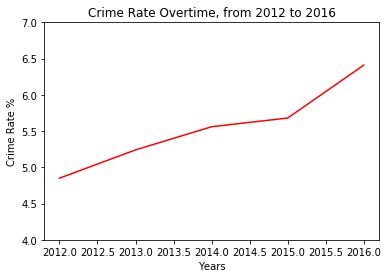

In [20]:
# Plot of Crime Rate Overtime, from 2012 to 2016
years = df_crime_sorted_Total['Year'].unique()
plt.plot(years, Crime_from_total.round(2), color="red", label="Crime %")
plt.title("Crime Rate Overtime, from 2012 to 2016")
plt.ylabel("Crime Rate %")
plt.xlabel("Years")
plt.ylim(4, 7)

# Saving Plot
plt.savefig("Total Crime Rate Overtime.png")

In [21]:
# DataFrame for Violence and Murder related Crime and its Crime Rate
# Including: NIB_ASSAULT, NIB_VIOLNCO, NIB_KIDNAP, NIB_PROPTOT, NIB_MURDER, NIB_MNSLGHTR, 
#            JRN_ASSAULT, JRN_VIOLNCO, JRN_KIDNAP, JRN_MURDER, JRN_MNSLGHTR
df_crime_sorted_VM = df_crime_sorted[['Year', 'County', 'NIB_ASSAULT', 'NIB_VIOLNCO', 'NIB_KIDNAP', 'NIB_PROPTOT', 
                                      'NIB_MURDER', 'NIB_MNSLGHTR', 'JRN_ASSAULT', 'JRN_VIOLNCO', 'JRN_KIDNAP', 
                                      'JRN_MURDER', 'JRN_MNSLGHTR', 'Total Population']]
df_crime_sorted_VM.head()

,Year,County,NIB_ASSAULT,NIB_VIOLNCO,NIB_KIDNAP,NIB_PROPTOT,NIB_MURDER,NIB_MNSLGHTR,JRN_ASSAULT,JRN_VIOLNCO,JRN_KIDNAP,JRN_MURDER,JRN_MNSLGHTR,Total Population
22,2012,ADAMS,252,71,3,1417,0,0,0,0,0,0,0,19050
23,2013,ADAMS,281,58,6,1472,3,0,30,0,0,0,0,19200
24,2014,ADAMS,314,96,3,1402,1,0,34,0,0,0,0,19400
25,2015,ADAMS,256,61,6,1128,0,0,28,1,0,0,0,19410
26,2016,ADAMS,280,70,2,876,1,0,21,0,0,0,0,19510


In [22]:
# Calculate Total Violence and Murder related Crime and its Crime Rate
df_crime_sorted_VM['Total Crime'] = (df_crime_sorted_VM['NIB_ASSAULT'] + df_crime_sorted_VM['NIB_VIOLNCO'] + 
                                     df_crime_sorted_VM['NIB_KIDNAP'] + df_crime_sorted_VM['NIB_PROPTOT'] +
                                     df_crime_sorted_VM['NIB_MURDER'] + df_crime_sorted_VM['NIB_MNSLGHTR'] +
                                     df_crime_sorted_VM['JRN_ASSAULT'] + df_crime_sorted_VM['JRN_VIOLNCO'] +
                                     df_crime_sorted_VM['JRN_KIDNAP'] + df_crime_sorted_VM['JRN_MURDER'] +
                                     df_crime_sorted_VM['JRN_MNSLGHTR'])

df_crime_sorted_VM['Crime %'] = ((df_crime_sorted_VM['Total Crime'] / df_crime_sorted_VM['Total Population'])*100).round(2)
df_crime_sorted_VM.head()

,Year,County,NIB_ASSAULT,NIB_VIOLNCO,NIB_KIDNAP,NIB_PROPTOT,NIB_MURDER,NIB_MNSLGHTR,JRN_ASSAULT,JRN_VIOLNCO,JRN_KIDNAP,JRN_MURDER,JRN_MNSLGHTR,Total Population,Total Crime,Crime %
22,2012,ADAMS,252,71,3,1417,0,0,0,0,0,0,0,19050,1743,9.15
23,2013,ADAMS,281,58,6,1472,3,0,30,0,0,0,0,19200,1850,9.64
24,2014,ADAMS,314,96,3,1402,1,0,34,0,0,0,0,19400,1850,9.54
25,2015,ADAMS,256,61,6,1128,0,0,28,1,0,0,0,19410,1480,7.62
26,2016,ADAMS,280,70,2,876,1,0,21,0,0,0,0,19510,1250,6.41


In [23]:
# Total Violence and Murder related Crime per Year
Total_Crime_VM = [df_crime_sorted_VM.loc[df_crime_sorted_VM['Year'] == 2012, 'Total Crime'].sum(), 
                df_crime_sorted_VM.loc[df_crime_sorted_VM['Year'] == 2013, 'Total Crime'].sum(), 
                df_crime_sorted_VM.loc[df_crime_sorted_VM['Year'] == 2014, 'Total Crime'].sum(), 
                df_crime_sorted_VM.loc[df_crime_sorted_VM['Year'] == 2015, 'Total Crime'].sum(), 
                df_crime_sorted_VM.loc[df_crime_sorted_VM['Year'] == 2016, 'Total Crime'].sum()]

Total_Crime_list_VM = np.array(Total_Crime_VM)

In [24]:
# Total Violence and Murder related Crime Rate per Year
Crime_from_total_VM = (Total_Crime_list_VM/Total_Pop_list)*100
Crime_from_total_VM.round(2)

array([4.42, 4.71, 5.02, 5.13, 5.78])

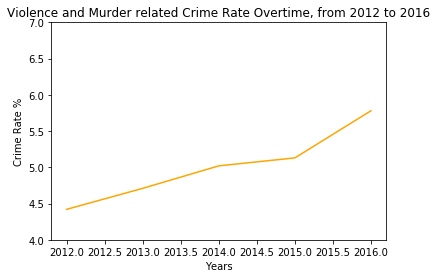

In [25]:
# Plot of Violence and Murder related Crime Rate Overtime, from 2012 to 2016
years = df_crime_sorted_VM['Year'].unique()
plt.plot(years, Crime_from_total_VM.round(2), color="orange", label="Crime %")
plt.title("Violence and Murder related Crime Rate Overtime, from 2012 to 2016")
plt.ylabel("Crime Rate %")
plt.xlabel("Years")
plt.ylim(4, 7)

# Saving Plot
plt.savefig("Total Violence and Murder related Crime Rate Overtime.png")

In [26]:
# DataFrame for Drugs related Crime and its Crime Rate
# Including: NIB_SCTYTOT, NIB_DRUGVIOL, JRN_DRUGVIOL
df_crime_sorted_D = df_crime_sorted[['Year', 'County', 'NIB_SCTYTOT', 'NIB_DRUGVIOL', 'JRN_DRUGVIOL', 'Total Population']]
df_crime_sorted_D.head()

,Year,County,NIB_SCTYTOT,NIB_DRUGVIOL,JRN_DRUGVIOL,Total Population
22,2012,ADAMS,152,90,0,19050
23,2013,ADAMS,123,67,33,19200
24,2014,ADAMS,124,88,47,19400
25,2015,ADAMS,127,93,33,19410
26,2016,ADAMS,149,116,27,19510


In [27]:
# Calculate Drugs related Crime and its Crime Rate
df_crime_sorted_D['Total Crime'] = (df_crime_sorted_D['NIB_SCTYTOT'] + df_crime_sorted_D['NIB_DRUGVIOL'] + 
                                     df_crime_sorted_D['JRN_DRUGVIOL'])

df_crime_sorted_D['Crime %'] = ((df_crime_sorted_D['Total Crime'] / df_crime_sorted_D['Total Population'])*100).round(2)
df_crime_sorted_D.head()

,Year,County,NIB_SCTYTOT,NIB_DRUGVIOL,JRN_DRUGVIOL,Total Population,Total Crime,Crime %
22,2012,ADAMS,152,90,0,19050,242,1.27
23,2013,ADAMS,123,67,33,19200,223,1.16
24,2014,ADAMS,124,88,47,19400,259,1.34
25,2015,ADAMS,127,93,33,19410,253,1.30
26,2016,ADAMS,149,116,27,19510,292,1.50


In [28]:
# Total Drugs related Crime per Year
Total_Crime_D = [df_crime_sorted_D.loc[df_crime_sorted_D['Year'] == 2012, 'Total Crime'].sum(), 
                df_crime_sorted_D.loc[df_crime_sorted_D['Year'] == 2013, 'Total Crime'].sum(), 
                df_crime_sorted_D.loc[df_crime_sorted_D['Year'] == 2014, 'Total Crime'].sum(), 
                df_crime_sorted_D.loc[df_crime_sorted_D['Year'] == 2015, 'Total Crime'].sum(), 
                df_crime_sorted_D.loc[df_crime_sorted_D['Year'] == 2016, 'Total Crime'].sum()]

Total_Crime_list_D = np.array(Total_Crime_D)

# Total Drugs related Crime Rate per Year
Crime_from_total_D = (Total_Crime_list_D/Total_Pop_list)*100
Crime_from_total_D.round(2)

array([0.68, 0.59, 0.62, 0.64, 0.79])

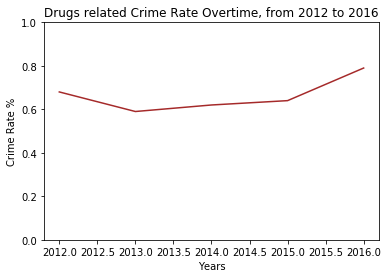

In [29]:
# Plot of Drugs related Crime Rate Overtime, from 2012 to 2016
years = df_crime_sorted_D['Year'].unique()
plt.plot(years, Crime_from_total_D.round(2), color="brown", label="Crime %")
plt.title("Drugs related Crime Rate Overtime, from 2012 to 2016")
plt.ylabel("Crime Rate %")
plt.xlabel("Years")
plt.ylim(0, 1)

# Saving Plot
plt.savefig("Total Drugs related Crime Rate Overtime.png")

In [30]:
# DataFrame for Robbery related Crime and its Crime Rate
# Including: NIB_EXTORTION, NIB_ROBBERY, NIB_THEFT, JRN_EXTORTION, JRN_ROBBERY, JRN_THEFT
df_crime_sorted_R = df_crime_sorted[['Year', 'County', 'NIB_EXTORTION', 'NIB_ROBBERY', 'NIB_THEFT', 
                                     'JRN_EXTORTION', 'JRN_ROBBERY', 'JRN_THEFT', 'Total Population']]
df_crime_sorted_R.head()

,Year,County,NIB_EXTORTION,NIB_ROBBERY,NIB_THEFT,JRN_EXTORTION,JRN_ROBBERY,JRN_THEFT,Total Population
22,2012,ADAMS,0,8,689,0,0,0,19050
23,2013,ADAMS,1,8,681,0,3,31,19200
24,2014,ADAMS,1,8,642,0,2,50,19400
25,2015,ADAMS,0,11,577,0,1,45,19410
26,2016,ADAMS,0,8,462,0,1,28,19510


In [31]:
# Calculate Robbery related Crime and its Crime Rate
df_crime_sorted_R['Total Crime'] = (df_crime_sorted_R['NIB_EXTORTION'] + df_crime_sorted_R['NIB_ROBBERY'] + 
                                     df_crime_sorted_R['NIB_THEFT'] + df_crime_sorted_R['JRN_EXTORTION'] + 
                                     df_crime_sorted_R['JRN_ROBBERY'] +  df_crime_sorted_R['JRN_THEFT'])

df_crime_sorted_R['Crime %'] = ((df_crime_sorted_R['Total Crime'] / df_crime_sorted_R['Total Population'])*100).round(2)
df_crime_sorted_R.head()

,Year,County,NIB_EXTORTION,NIB_ROBBERY,NIB_THEFT,JRN_EXTORTION,JRN_ROBBERY,JRN_THEFT,Total Population,Total Crime,Crime %
22,2012,ADAMS,0,8,689,0,0,0,19050,697,3.66
23,2013,ADAMS,1,8,681,0,3,31,19200,724,3.77
24,2014,ADAMS,1,8,642,0,2,50,19400,703,3.62
25,2015,ADAMS,0,11,577,0,1,45,19410,634,3.27
26,2016,ADAMS,0,8,462,0,1,28,19510,499,2.56


In [32]:
# Total Robbery related Crime per Year
Total_Crime_R = [df_crime_sorted_R.loc[df_crime_sorted_R['Year'] == 2012, 'Total Crime'].sum(), 
                df_crime_sorted_R.loc[df_crime_sorted_R['Year'] == 2013, 'Total Crime'].sum(), 
                df_crime_sorted_R.loc[df_crime_sorted_R['Year'] == 2014, 'Total Crime'].sum(), 
                df_crime_sorted_R.loc[df_crime_sorted_R['Year'] == 2015, 'Total Crime'].sum(), 
                df_crime_sorted_R.loc[df_crime_sorted_R['Year'] == 2016, 'Total Crime'].sum()]

Total_Crime_list_R = np.array(Total_Crime_R)

# Total Robbery related Crime Rate per Year
Crime_from_total_R = (Total_Crime_list_R/Total_Pop_list)*100
Crime_from_total_R.round(2)

array([2.19, 2.42, 2.68, 2.7 , 3.07])

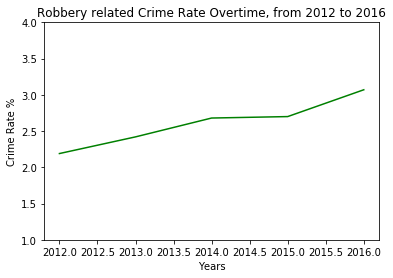

In [33]:
# Plot of Robbery related Crime Rate Overtime, from 2012 to 2016
years = df_crime_sorted_R['Year'].unique()
plt.plot(years, Crime_from_total_R.round(2), color="green", label="Crime %")
plt.title("Robbery related Crime Rate Overtime, from 2012 to 2016")
plt.ylabel("Crime Rate %")
plt.xlabel("Years")
plt.ylim(1, 4)

# Saving Plot
plt.savefig("Total Robbery related Crime Rate Overtime.png")

In [34]:
# DataFrame for Properties Crime and its Crime Rate
# Including: NIB_PROPTOT, NIB_ARSON, NIB_BRIBERY, NIB_BURGLARY, JRN_ARSON, JRN_BURGLARY
df_crime_sorted_P = df_crime_sorted[['Year', 'County', 'NIB_PROPTOT', 'NIB_ARSON', 'NIB_BRIBERY', 'NIB_BURGLARY', 
                                     'JRN_ARSON', 'JRN_BURGLARY', 'Total Population']]
df_crime_sorted_P.head()

,Year,County,NIB_PROPTOT,NIB_ARSON,NIB_BRIBERY,NIB_BURGLARY,JRN_ARSON,JRN_BURGLARY,Total Population
22,2012,ADAMS,1417,10,0,182,0,0,19050
23,2013,ADAMS,1472,7,0,199,2,5,19200
24,2014,ADAMS,1402,10,0,190,0,7,19400
25,2015,ADAMS,1128,8,0,189,0,7,19410
26,2016,ADAMS,876,1,0,144,0,16,19510


In [35]:
# Calculate Properties Crime and its Crime Rate
df_crime_sorted_P['Total Crime'] = (df_crime_sorted_P['NIB_PROPTOT'] + df_crime_sorted_P['NIB_ARSON'] + 
                                     df_crime_sorted_P['NIB_BRIBERY'] + df_crime_sorted_P['NIB_BURGLARY'] + 
                                     df_crime_sorted_P['JRN_ARSON'] +  df_crime_sorted_P['JRN_BURGLARY'])

df_crime_sorted_P['Crime %'] = ((df_crime_sorted_P['Total Crime'] / df_crime_sorted_P['Total Population'])*100).round(2)
df_crime_sorted_P.head()

,Year,County,NIB_PROPTOT,NIB_ARSON,NIB_BRIBERY,NIB_BURGLARY,JRN_ARSON,JRN_BURGLARY,Total Population,Total Crime,Crime %
22,2012,ADAMS,1417,10,0,182,0,0,19050,1609,8.45
23,2013,ADAMS,1472,7,0,199,2,5,19200,1685,8.78
24,2014,ADAMS,1402,10,0,190,0,7,19400,1609,8.29
25,2015,ADAMS,1128,8,0,189,0,7,19410,1332,6.86
26,2016,ADAMS,876,1,0,144,0,16,19510,1037,5.32


In [36]:
# Total Properties related Crime per Year
Total_Crime_P = [df_crime_sorted_P.loc[df_crime_sorted_P['Year'] == 2012, 'Total Crime'].sum(), 
                df_crime_sorted_P.loc[df_crime_sorted_P['Year'] == 2013, 'Total Crime'].sum(), 
                df_crime_sorted_P.loc[df_crime_sorted_P['Year'] == 2014, 'Total Crime'].sum(), 
                df_crime_sorted_P.loc[df_crime_sorted_P['Year'] == 2015, 'Total Crime'].sum(), 
                df_crime_sorted_P.loc[df_crime_sorted_P['Year'] == 2016, 'Total Crime'].sum()]

Total_Crime_list_P = np.array(Total_Crime_P)

# Total Properties related Crime Rate per Year
Crime_from_total_P = (Total_Crime_list_P/Total_Pop_list)*100
Crime_from_total_P.round(2)

array([4.1 , 4.32, 4.58, 4.63, 5.2 ])

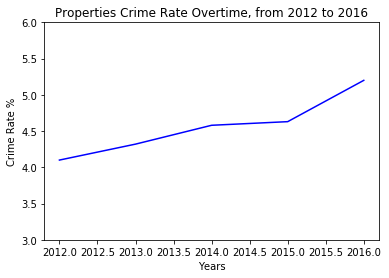

In [37]:
# Plot of Properties Crime Rate Overtime, from 2012 to 2016
years = df_crime_sorted_P['Year'].unique()
plt.plot(years, Crime_from_total_P.round(2), color="blue", label="Crime %")
plt.title("Properties Crime Rate Overtime, from 2012 to 2016")
plt.ylabel("Crime Rate %")
plt.xlabel("Years")
plt.ylim(3, 6)

# Saving Plot
plt.savefig("Total Properties Crime Rate Overtime.png")

In [38]:
# DataFrame for Sexual Crime and its Crime Rate
# Including: NIB_FSEX, NIB_NFSEX, NIB_HTRFFCKNG, JRN_FSEX, JRN_NFSEX
df_crime_sorted_S = df_crime_sorted[['Year', 'County', 'NIB_FSEX', 'NIB_NFSEX', 'NIB_HTRFFCKNG', 
                                     'JRN_FSEX', 'JRN_NFSEX', 'Total Population']]
df_crime_sorted_S.head()

,Year,County,NIB_FSEX,NIB_NFSEX,NIB_HTRFFCKNG,JRN_FSEX,JRN_NFSEX,Total Population
22,2012,ADAMS,19,1,0,0,0,19050
23,2013,ADAMS,26,2,0,3,0,19200
24,2014,ADAMS,19,1,0,0,0,19400
25,2015,ADAMS,26,3,0,1,0,19410
26,2016,ADAMS,18,2,0,1,0,19510


In [39]:
# Calculate Sexual Crime and its Crime Rate
df_crime_sorted_S['Total Crime'] = (df_crime_sorted_S['NIB_FSEX'] + df_crime_sorted_S['NIB_NFSEX'] + 
                                     df_crime_sorted_S['NIB_HTRFFCKNG'] + df_crime_sorted_S['JRN_FSEX'] + 
                                     df_crime_sorted_S['JRN_NFSEX'])

df_crime_sorted_S['Crime %'] = ((df_crime_sorted_S['Total Crime'] / df_crime_sorted_S['Total Population'])*100).round(2)
df_crime_sorted_S.head()

,Year,County,NIB_FSEX,NIB_NFSEX,NIB_HTRFFCKNG,JRN_FSEX,JRN_NFSEX,Total Population,Total Crime,Crime %
22,2012,ADAMS,19,1,0,0,0,19050,20,0.10
23,2013,ADAMS,26,2,0,3,0,19200,31,0.16
24,2014,ADAMS,19,1,0,0,0,19400,20,0.10
25,2015,ADAMS,26,3,0,1,0,19410,30,0.15
26,2016,ADAMS,18,2,0,1,0,19510,21,0.11


In [40]:
# Total Sexual related Crime per Year
Total_Crime_S = [df_crime_sorted_S.loc[df_crime_sorted_S['Year'] == 2012, 'Total Crime'].sum(), 
                df_crime_sorted_S.loc[df_crime_sorted_S['Year'] == 2013, 'Total Crime'].sum(), 
                df_crime_sorted_S.loc[df_crime_sorted_S['Year'] == 2014, 'Total Crime'].sum(), 
                df_crime_sorted_S.loc[df_crime_sorted_S['Year'] == 2015, 'Total Crime'].sum(), 
                df_crime_sorted_S.loc[df_crime_sorted_S['Year'] == 2016, 'Total Crime'].sum()]

Total_Crime_list_S = np.array(Total_Crime_S)

# Total Sexual related Crime Rate per Year
Crime_from_total_S = (Total_Crime_list_S/Total_Pop_list)*100
Crime_from_total_S.round(2)

array([0.06, 0.06, 0.07, 0.07, 0.08])

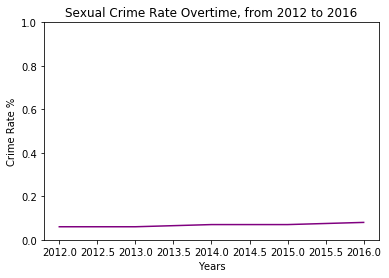

In [41]:
# Plot of Sexual Crime Rate Overtime, from 2012 to 2016
years = df_crime_sorted_S['Year'].unique()
plt.plot(years, Crime_from_total_S.round(2), color="purple", label="Crime %")
plt.title("Sexual Crime Rate Overtime, from 2012 to 2016")
plt.ylabel("Crime Rate %")
plt.xlabel("Years")
plt.ylim(0, 1)

# Saving Plot
plt.savefig("Total Sexual Crime Rate Overtime.png")

In [44]:
# DataFrame for Total Crime and Crime Rate (Segmented by Gender)
df_crime_sorted_Gender = df_crime_sorted[['Year', 'County', 'JRN_TOTAL', 'NIB_TOTAL', 'Total Male', 
                                          'Total Female', 'Total Population']]
df_crime_sorted_Gender.head()

,Year,County,JRN_TOTAL,NIB_TOTAL,Total Male,Total Female,Total Population
22,2012,ADAMS,0,1915,9575,9475,19050
23,2013,ADAMS,159,1971,9761,9439,19200
24,2014,ADAMS,162,1960,9882,9518,19400
25,2015,ADAMS,163,1607,9885,9525,19410
26,2016,ADAMS,127,1398,9914,9596,19510


In [45]:
# Calculate Total Crime (JRN + NIB)
df_crime_sorted_Gender['Total Crime'] = df_crime_sorted_Total['JRN_TOTAL'] + df_crime_sorted_Total['NIB_TOTAL']

In [47]:
# Calculate Crime Rate by Gender (Total Crime/ Total Population)
df_crime_sorted_Gender['Male Crime %'] = ((df_crime_sorted_Gender['Total Crime'] / df_crime_sorted_Gender['Total Male'])*100).round(2)
df_crime_sorted_Gender['Female Crime %'] = ((df_crime_sorted_Gender['Total Crime'] / df_crime_sorted_Gender['Total Female'])*100).round(2)
df_crime_sorted_Gender.head()

,Year,County,JRN_TOTAL,NIB_TOTAL,Total Male,Total Female,Total Population,Total Crime,Male Crime %,Female Crime %
22,2012,ADAMS,0,1915,9575,9475,19050,1915,20.00,20.21
23,2013,ADAMS,159,1971,9761,9439,19200,2130,21.82,22.57
24,2014,ADAMS,162,1960,9882,9518,19400,2122,21.47,22.29
25,2015,ADAMS,163,1607,9885,9525,19410,1770,17.91,18.58
26,2016,ADAMS,127,1398,9914,9596,19510,1525,15.38,15.89


In [48]:
# Total Male Population per Year
Total_Pop_M = [df_crime_sorted_Gender.loc[df_crime_sorted_Gender['Year'] == 2012, 'Total Male'].sum(), 
                df_crime_sorted_Gender.loc[df_crime_sorted_Gender['Year'] == 2013, 'Total Male'].sum(), 
                df_crime_sorted_Gender.loc[df_crime_sorted_Gender['Year'] == 2014, 'Total Male'].sum(), 
                df_crime_sorted_Gender.loc[df_crime_sorted_Gender['Year'] == 2015, 'Total Male'].sum(), 
                df_crime_sorted_Gender.loc[df_crime_sorted_Gender['Year'] == 2016, 'Total Male'].sum()]

Total_Pop_M = np.array(Total_Pop_M)

In [49]:
# Total Female Population per Year
Total_Pop_F = [df_crime_sorted_Gender.loc[df_crime_sorted_Gender['Year'] == 2012, 'Total Female'].sum(), 
                df_crime_sorted_Gender.loc[df_crime_sorted_Gender['Year'] == 2013, 'Total Female'].sum(), 
                df_crime_sorted_Gender.loc[df_crime_sorted_Gender['Year'] == 2014, 'Total Female'].sum(), 
                df_crime_sorted_Gender.loc[df_crime_sorted_Gender['Year'] == 2015, 'Total Female'].sum(), 
                df_crime_sorted_Gender.loc[df_crime_sorted_Gender['Year'] == 2016, 'Total Female'].sum()]

Total_Pop_F = np.array(Total_Pop_F)

In [50]:
# Total Crime Rate per Year (Male)
Crime_from_total_M = (Total_Crime_list/Total_Pop_M)*100
Crime_from_total_M.round(2)

array([ 9.73, 10.51, 11.16, 11.39, 12.86])

In [51]:
# Total Crime Rate per Year (Female)
Crime_from_total_F = (Total_Crime_list/Total_Pop_F)*100
Crime_from_total_F.round(2)

array([ 9.67, 10.44, 11.08, 11.33, 12.8 ])

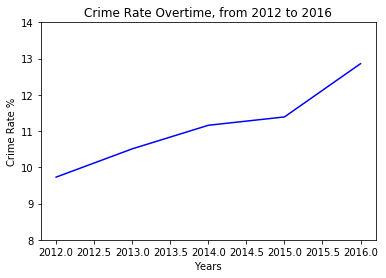

In [52]:
# Plot of Crime Rate Overtime, from 2012 to 2016
years = df_crime_sorted_Gender['Year'].unique()
plt.plot(years, Crime_from_total_M.round(2), color="blue", label="Crime %")
plt.title("Crime Rate Overtime, from 2012 to 2016")
plt.ylabel("Crime Rate %")
plt.xlabel("Years")
plt.ylim(8, 14)

# Saving Plot
plt.savefig("Total Male Crime Rate Overtime.png")

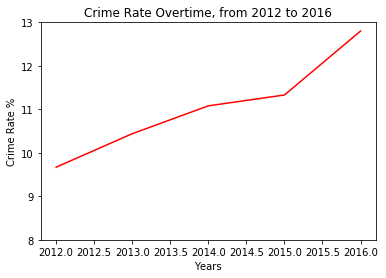

In [53]:
# Plot of Crime Rate Overtime, from 2012 to 2016
years = df_crime_sorted_Gender['Year'].unique()
plt.plot(years, Crime_from_total_F.round(2), color="red", label="Crime %")
plt.title("Crime Rate Overtime, from 2012 to 2016")
plt.ylabel("Crime Rate %")
plt.xlabel("Years")
plt.ylim(8, 13)

# Saving Plot
plt.savefig("Total Female Crime Rate Overtime.png")

In [ ]:
# DataFrame for Total Crime and Crime Rate
df_crime_sorted_Total = df_crime_sorted[['Year', 'County','JRN_TOTAL','NIB_TOTAL', 'Total Population']]
df_crime_sorted_Total.head()

In [ ]:
# DataFrame for Total Crime and Crime Rate (Segmented by Age)
df_crime_sorted_Age = df_crime_sorted[['Year', 'County', 'POP_M_0TO11', 'POP_M_12TO17', 'POP_M_18TO39', 
                                       'POP_M_40UP', 'POP_F_0TO11', 'POP_F_12TO17', 'POP_F_18TO39',
                                       'POP_F_40UP', 'Total Population']]
df_crime_sorted_Age.head()